In [1]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
pk_names = ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Mega Venusaur', 'Charmander', 'Charmeleon', 'Charizard', 'Mega Charizard X', 'Mega Charizard Y', 'Squirtle', 'Wartortle', 'Blastoise', 'Mega Blastoise', 'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Mega Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Mega Pidgeot', 'Rattata', 'Alolan Rattata', 'Raticate', 'Alolan Raticate', 'Totem Alolan Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pichu', 'Pikachu', 'Cosplay Pikachu', 'Pikachu Rock Star', 'Pikachu Belle', 'Pikachu Pop Star', 'Pikachu Ph.D.', 'Pikachu Libre', 'Original Cap Pikachu', 'Hoenn Cap Pikachu', 'Sinnoh Cap Pikachu', 'Unova Cap Pikachu', 'Kalos Cap Pikachu', 'Alola Cap Pikachu', 'Pikachu', 'Raichu', 'Alolan Raichu', 'Sandshrew', 'Alolan Sandshrew', 'Sandslash', 'Alolan Sandslash', 'Nidoran♀', 'Nidorina', 'Nidoqueen', 'Nidoran♂', 'Nidorino', 'Nidoking', 'Cleffa', 'Clefairy', 'Clefable', 'Vulpix', 'Alolan Vulpix', 'Ninetales', 'Alolan Ninetales', 'Igglybuff', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Crobat', 'Oddish', 'Gloom', 'Vileplume', 'Bellossom', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Alolan Diglett', 'Dugtrio', 'Alolan Dugtrio', 'Meowth', 'Alolan Meowth', 'Persian', 'Alolan Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Politoed', 'Abra', 'Kadabra', 'Alakazam', 'Mega Alakazam', 'Machop', 'Machoke', 'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Tentacool', 'Tentacruel', 'Geodude', 'Alolan Geodude', 'Graveler', 'Alolan Graveler', 'Golem', 'Alolan Golem', 'Ponyta', 'Rapidash', 'Slowpoke', 'Slowbro', 'Mega Slowbro', 'Slowking', 'Magnemite', 'Magneton', 'Magnezone', 'Farfetch’d', 'Doduo', 'Dodrio', 'Seel', 'Dewgong', 'Grimer', 'Alolan Grimer', 'Muk', 'Alolan Muk', 'Shellder', 'Cloyster', 'Gastly', 'Haunter', 'Gengar', 'Mega Gengar', 'Onix', 'Steelix', 'Mega Steelix', 'Drowzee', 'Hypno', 'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Exeggcute', 'Exeggutor', 'Alolan Exeggutor', 'Cubone', 'Marowak', 'Alolan Marowak', 'Marowak', 'Tyrogue', 'Hitmonlee', 'Hitmonchan', 'Hitmontop', 'Lickitung', 'Lickilicky', 'Koffing', 'Weezing', 'Rhyhorn', 'Rhydon', 'Rhyperior', 'Happiny', 'Chansey', 'Blissey', 'Tangela', 'Tangrowth', 'Kangaskhan', 'Mega Kangaskhan', 'Horsea', 'Seadra', 'Kingdra', 'Goldeen', 'Seaking', 'Staryu', 'Starmie', 'Mime Jr.', 'Mr. Mime', 'Scyther', 'Scizor', 'Mega Scizor', 'Smoochum', 'Jynx', 'Elekid', 'Electabuzz', 'Electivire', 'Magby', 'Magmar', 'Magmortar', 'Pinsir', 'Mega Pinsir', 'Tauros', 'Magikarp', 'Gyarados', 'Mega Gyarados', 'Lapras', 'Ditto', 'Eevee', 'Vaporeon', 'Jolteon', 'Flareon', 'Espeon', 'Umbreon', 'Leafeon', 'Glaceon', 'Sylveon', 'Porygon', 'Porygon2', 'Porygon-Z', 'Omanyte', 'Omastar', 'Kabuto', 'Kabutops', 'Aerodactyl', 'Mega Aerodactyl', 'Munchlax', 'Snorlax', 'Articuno', 'Zapdos', 'Moltres', 'Dratini', 'Dragonair', 'Dragonite', 'Mewtwo', 'Mega Mewtwo X', 'Mega Mewtwo Y', 'Mew', 'Chikorita', 'Bayleef', 'Meganium', 'Cyndaquil', 'Quilava', 'Typhlosion', 'Totodile', 'Croconaw', 'Feraligatr', 'Sentret', 'Furret', 'Hoothoot', 'Noctowl', 'Ledyba', 'Ledian', 'Spinarak', 'Ariados', 'Chinchou', 'Lanturn', 'Togepi', 'Togetic', 'Togekiss', 'Natu', 'Xatu', 'Mareep', 'Flaaffy', 'Ampharos', 'Mega Ampharos', 'Azurill', 'Marill', 'Azumarill', 'Bonsly', 'Sudowoodo', 'Hoppip', 'Skiploom', 'Jumpluff', 'Aipom', 'Ambipom', 'Sunkern', 'Sunflora', 'Yanma', 'Yanmega', 'Wooper', 'Quagsire', 'Murkrow', 'Honchkrow', 'Misdreavus', 'Mismagius', 'Unown A', 'Wynaut', 'Wobbuffet', 'Girafarig', 'Pineco', 'Forretress', 'Dunsparce', 'Gligar', 'Gliscor', 'Snubbull', 'Granbull', 'Qwilfish', 'Shuckle', 'Heracross', 'Mega Heracross', 'Sneasel', 'Weavile', 'Teddiursa', 'Ursaring', 'Slugma', 'Magcargo', 'Swinub', 'Piloswine', 'Mamoswine', 'Corsola', 'Remoraid', 'Octillery', 'Delibird', 'Mantyke', 'Mantine', 'Skarmory', 'Houndour', 'Houndoom', 'Mega Houndoom', 'Phanpy', 'Donphan', 'Stantler', 'Smeargle', 'Miltank', 'Raikou', 'Entei', 'Suicune', 'Larvitar', 'Pupitar', 'Tyranitar', 'Mega Tyranitar', 'Lugia', 'Ho-Oh', 'Celebi', 'Treecko', 'Grovyle', 'Sceptile', 'Mega Sceptile', 'Torchic', 'Combusken', 'Blaziken', 'Mega Blaziken', 'Mudkip', 'Marshtomp', 'Swampert', 'Mega Swampert', 'Poochyena', 'Mightyena', 'Zigzagoon', 'Linoone', 'Wurmple', 'Silcoon', 'Beautifly', 'Cascoon', 'Dustox', 'Lotad', 'Lombre', 'Ludicolo', 'Seedot', 'Nuzleaf', 'Shiftry', 'Taillow', 'Swellow', 'Wingull', 'Pelipper', 'Ralts', 'Kirlia', 'Gardevoir', 'Mega Gardevoir', 'Gallade', 'Mega Gallade', 'Surskit', 'Masquerain', 'Shroomish', 'Breloom', 'Slakoth', 'Vigoroth', 'Slaking', 'Nincada', 'Ninjask', 'Shedinja', 'Whismur', 'Loudred', 'Exploud', 'Makuhita', 'Hariyama', 'Nosepass', 'Probopass', 'Skitty', 'Delcatty', 'Sableye', 'Mega Sableye', 'Mawile', 'Mega Mawile', 'Aron', 'Lairon', 'Aggron', 'Mega Aggron', 'Meditite', 'Medicham', 'Mega Medicham', 'Electrike', 'Manectric', 'Mega Manectric', 'Plusle', 'Minun', 'Volbeat', 'Illumise', 'Budew', 'Roselia', 'Roserade', 'Gulpin', 'Swalot', 'Carvanha', 'Sharpedo', 'Mega Sharpedo', 'Wailmer', 'Wailord', 'Numel', 'Camerupt', 'Mega Camerupt', 'Torkoal', 'Spoink', 'Grumpig', 'Spinda', 'Trapinch', 'Vibrava', 'Flygon', 'Cacnea', 'Cacturne', 'Swablu', 'Altaria', 'Mega Altaria', 'Zangoose', 'Seviper', 'Lunatone', 'Solrock', 'Barboach', 'Whiscash', 'Corphish', 'Crawdaunt', 'Baltoy', 'Claydol', 'Lileep', 'Cradily', 'Anorith', 'Armaldo', 'Feebas', 'Milotic', 'Castform', 'Sunny Castform', 'Rainy Castform', 'Snowy Castform', 'Kecleon', 'Shuppet', 'Banette', 'Mega Banette', 'Duskull', 'Dusclops', 'Dusknoir', 'Tropius', 'Chingling', 'Chimecho', 'Absol', 'Mega Absol', 'Snorunt', 'Glalie', 'Mega Glalie', 'Froslass', 'Spheal', 'Sealeo', 'Walrein', 'Clamperl', 'Huntail', 'Gorebyss', 'Relicanth', 'Luvdisc', 'Bagon', 'Shelgon', 'Salamence', 'Mega Salamence', 'Beldum', 'Metang', 'Metagross', 'Mega Metagross', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Mega Latias', 'Latios', 'Mega Latios', 'Kyogre', 'Primal Kyogre', 'Groudon', 'Primal Groudon', 'Rayquaza', 'Mega Rayquaza', 'Jirachi', 'Normal Deoxys', 'Attack Deoxys', 'Defense Deoxys', 'Speed Deoxys', 'Turtwig', 'Grotle', 'Torterra', 'Chimchar', 'Monferno', 'Infernape', 'Piplup', 'Prinplup', 'Empoleon', 'Starly', 'Staravia', 'Staraptor', 'Bidoof', 'Bibarel', 'Kricketot', 'Kricketune', 'Shinx', 'Luxio', 'Luxray', 'Cranidos', 'Rampardos', 'Shieldon', 'Bastiodon', 'Plant Burmy', 'Plant Wormadam', 'Sandy Wormadam', 'Trash Wormadam', 'Mothim', 'Combee', 'Vespiquen', 'Pachirisu', 'Buizel', 'Floatzel', 'Cherubi', 'Overcast Cherrim', 'West Shellos', 'West Gastrodon', 'Drifloon', 'Drifblim', 'Buneary', 'Lopunny', 'Mega Lopunny', 'Glameow', 'Purugly', 'Stunky', 'Skuntank', 'Bronzor', 'Bronzong', 'Chatot', 'Spiritomb', 'Gible', 'Gabite', 'Garchomp', 'Mega Garchomp', 'Riolu', 'Lucario', 'Mega Lucario', 'Hippopotas', 'Hippowdon', 'Skorupi', 'Drapion', 'Croagunk', 'Toxicroak', 'Carnivine', 'Finneon', 'Lumineon', 'Snover', 'Abomasnow', 'Mega Abomasnow', 'Rotom', 'Heat Rotom', 'Wash Rotom', 'Frost Rotom', 'Fan Rotom', 'Mow Rotom', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Altered Giratina', 'Origin Giratina', 'Cresselia', 'Phione', 'Manaphy', 'Darkrai', 'Land Shaymin', 'Sky Shaymin', 'Normal Arceus', 'Victini', 'Snivy', 'Servine', 'Serperior', 'Tepig', 'Pignite', 'Emboar', 'Oshawott', 'Dewott', 'Samurott', 'Patrat', 'Watchog', 'Lillipup', 'Herdier', 'Stoutland', 'Purrloin', 'Liepard', 'Pansage', 'Simisage', 'Pansear', 'Simisear', 'Panpour', 'Simipour', 'Munna', 'Musharna', 'Pidove', 'Tranquill', 'Unfezant', 'Blitzle', 'Zebstrika', 'Roggenrola', 'Boldore', 'Gigalith', 'Woobat', 'Swoobat', 'Drilbur', 'Excadrill', 'Audino', 'Mega Audino', 'Timburr', 'Gurdurr', 'Conkeldurr', 'Tympole', 'Palpitoad', 'Seismitoad', 'Throh', 'Sawk', 'Sewaddle', 'Swadloon', 'Leavanny', 'Venipede', 'Whirlipede', 'Scolipede', 'Cottonee', 'Whimsicott', 'Petilil', 'Lilligant', 'Red-Striped Basculin', 'Blue-Striped Basculin', 'Sandile', 'Krokorok', 'Krookodile', 'Darumaka', 'Standard Darmanitan', 'Zen Darmanitan', 'Maractus', 'Dwebble', 'Crustle', 'Scraggy', 'Scrafty', 'Sigilyph', 'Yamask', 'Cofagrigus', 'Tirtouga', 'Carracosta', 'Archen', 'Archeops', 'Trubbish', 'Garbodor', 'Zorua', 'Zoroark', 'Minccino', 'Cinccino', 'Gothita', 'Gothorita', 'Gothitelle', 'Solosis', 'Duosion', 'Reuniclus', 'Ducklett', 'Swanna', 'Vanillite', 'Vanillish', 'Vanilluxe', 'Spring Deerling', 'Spring Sawsbuck', 'Emolga', 'Karrablast', 'Escavalier', 'Foongus', 'Amoonguss', 'Frillish', 'Jellicent', 'Alomomola', 'Joltik', 'Galvantula', 'Ferroseed', 'Ferrothorn', 'Klink', 'Klang', 'Klinklang', 'Tynamo', 'Eelektrik', 'Eelektross', 'Elgyem', 'Beheeyem', 'Litwick', 'Lampent', 'Chandelure', 'Axew', 'Fraxure', 'Haxorus', 'Cubchoo', 'Beartic', 'Cryogonal', 'Shelmet', 'Accelgor', 'Stunfisk', 'Mienfoo', 'Mienshao', 'Druddigon', 'Golett', 'Golurk', 'Pawniard', 'Bisharp', 'Bouffalant', 'Rufflet', 'Braviary', 'Vullaby', 'Mandibuzz', 'Heatmor', 'Durant', 'Deino', 'Zweilous', 'Hydreigon', 'Larvesta', 'Volcarona', 'Cobalion', 'Terrakion', 'Virizion', 'Incarnate Tornadus', 'Therian Tornadus', 'Incarnate Thundurus', 'Therian Thundurus', 'Reshiram', 'Zekrom', 'Incarnate Landorus', 'Therian Landorus', 'Kyurem', 'White Kyurem', 'Black Kyurem', 'Ordinary Keldeo', 'Resolute Keldeo', 'Aria Meloetta', 'Pirouette Meloetta', 'Genesect', 'Chespin', 'Quilladin', 'Chesnaught', 'Fennekin', 'Braixen', 'Delphox', 'Froakie', 'Frogadier', 'Greninja', 'Battle Bond Greninja', "Ash's Greninja", 'Bunnelby', 'Diggersby', 'Fletchling', 'Fletchinder', 'Talonflame', 'Scatterbug', 'Spewpa', 'Icy Snow Vivillon', 'Litleo', 'Pyroar', 'Red Flabébé', 'Red Floette', 'Eternal Floette', 'Red Florges', 'Skiddo', 'Gogoat', 'Pancham', 'Pangoro', 'Natural Furfrou', 'Espurr', 'Male Meowstic', 'Female Meowstic', 'Honedge', 'Doublade', 'Shield Aegislash', 'Blade Aegislash', 'Spritzee', 'Aromatisse', 'Swirlix', 'Slurpuff', 'Inkay', 'Malamar', 'Binacle', 'Barbaracle', 'Skrelp', 'Dragalge', 'Clauncher', 'Clawitzer', 'Helioptile', 'Heliolisk', 'Tyrunt', 'Tyrantrum', 'Amaura', 'Aurorus', 'Hawlucha', 'Dedenne', 'Carbink', 'Goomy', 'Sliggoo', 'Goodra', 'Klefki', 'Phantump', 'Trevenant', 'Average Pumpkaboo', 'Small Pumpkaboo', 'Large Pumpkaboo', 'Super Pumpkaboo', 'Average Gourgeist', 'Small Gourgeist', 'Large Gourgeist', 'Super Gourgeist', 'Bergmite', 'Avalugg', 'Noibat', 'Noivern', 'Neutral Xerneas', 'Yveltal', 'Zygarde', '10% Zygarde', '50% Zygarde', 'Complete Zygarde', 'Diancie', 'Mega Diancie', 'Confined Hoopa', 'Hoopa Unbound', 'Volcanion', 'Rowlet', 'Dartrix', 'Decidueye', 'Litten', 'Torracat', 'Incineroar', 'Popplio', 'Brionne', 'Primarina', 'Pikipek', 'Trumbeak', 'Toucannon', 'Yungoos', 'Gumshoos', 'Totem Gumshoos', 'Grubbin', 'Charjabug', 'Vikavolt', 'Totem Vikavolt', 'Crabrawler', 'Crabominable', 'Baile Oricorio', 'Pom-pom Oricorio', 'Pa’u Oricorio', 'Sensu Oricorio', 'Cutiefly', 'Ribombee', 'Totem Ribombee', 'Rockruff', 'Own Tempo Rockruff', 'Midday Lycanroc', 'Midnight Lycanroc', 'Dusk Lycanroc', 'Solo Wishiwashi', 'School Wishiwashi', 'Mareanie', 'Toxapex', 'Mudbray', 'Mudsdale', 'Dewpider', 'Araquanid', 'Totem Araquanid', 'Fomantis', 'Lurantis', 'Totem Lurantis', 'Morelull', 'Shiinotic', 'Salandit', 'Salazzle', 'Totem Salazzle', 'Stufful', 'Bewear', 'Bounsweet', 'Steenee', 'Tsareena', 'Comfey', 'Oranguru', 'Passimian', 'Wimpod', 'Golisopod', 'Sandygast', 'Palossand', 'Pyukumuku', 'Type: Null', 'Silvally', 'Red Meteor Minior', 'Orange Meteor Minior', 'Yellow Meteor Minior', 'Green Meteor Minior', 'Blue Meteor Minior', 'Indigo Meteor Minior', 'Violent Meteor Minior', 'Red Core Minior', 'Orange Core Minior', 'Yellow Core Minior', 'Green Core Minior', 'Blue Core Minior', 'Indigo Core Minior', 'Violet Core Minior', 'Komala', 'Turtonator', 'Togedemaru', 'Totem Togedemaru', 'Disguised Mimikyu', 'Busted Mimikyu', 'Totem Disguised Mimikyu', 'Totem Busted Mimikyu', 'Bruxish', 'Drampa', 'Dhelmise', 'Jangmo-o', 'Hakamo-o', 'Kommo-o', 'Totem Kommo’o', 'Tapu Koko', 'Tapu Lele', 'Tapu Bulu', 'Tapu Fini', 'Cosmog', 'Cosmoem', 'Solgaleo', 'Lunala', 'Nihilego', 'Buzzwole', 'Pheromosa', 'Xurkitree', 'Celesteela', 'Kartana', 'Guzzlord', 'Necrozma', 'Dusk Necrozma', 'Dawn Necrozma', 'Ultra Necrozma', 'Magearna', 'Original Magearna', 'Marshadow', 'Poipole', 'Naganadel', 'Stakataka', 'Blacephalon', 'Zeraora']

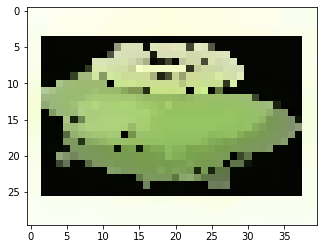

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-j8nxabm_\opencv\modules\photo\src\denoising.cpp:178: error: (-5:Bad argument) Type of input image should be CV_8UC3 or CV_8UC4! in function 'cv::fastNlMeansDenoisingColored'


In [8]:
imgnum = 0
Found = False
for img in range(1):
    imgnum += 1
    imgtocheck = Image.open("Discord Images\pokemon-" + str(imgnum) + '.png')
    numpydata1 = np.array(imgtocheck)
    numpydata1 = cv2.resize(numpydata1, (40,30))
    iarray1 = cv2.fastNlMeansDenoisingColored(numpydata1,None,10,10,7,21)
    plt.imshow(iarray1)
    plt.show()
    
    for name in pk_names:
        img = Image.open(str(name) + '.jpeg')
        numpydata = np.array(img)
        numpydata = np.uint8(numpydata)
        iarray2 = cv2.fastNlMeansDenoisingColored(numpydata,None,10,10,7,21)
        
        if (iarray1 == iarray2):
            print("..c " + name)
            Found = True
            break
            
    if Found != True:
        print("not found")
        plt.imshow(numpydata)
        plt.show()
    
plt.show()

In [4]:
for name in pk_names:
        
    img = Image.open(str(name) + '.jpeg')
    numpydata = np.array(img)
        
    print(numpydata.shape)

(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(30, 40)
(

In [5]:
numpy = cv2.resize(numpydata1, (30,40))
print(numpy)

[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]
